<a href="https://colab.research.google.com/github/Bstha123/CodeAlpha_Titanic_Classification/blob/main/Titanic_Survival_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**2. Data Collection & Preprocessing**

In [ ]:
train = pd.read_csv("/train.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Checking the number of missing values in each column
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**3. Handling the missing values**

In [ ]:
#In the cabin column majority of the values are missing the column. so just drop the column
train = train.drop(columns = "Cabin", axis = 1)

In [ ]:
#Replacing the missing values in "Age" column with its mean value
train["Age"].fillna(train["Age"].mean(), inplace = True)

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Finding the mode value of "Embarked" column
print(train["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
train["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
#Replacing the missing value in the "Embarked" column with the mode value
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace = True)

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**4. Data Analysis & Visualization**

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train["Survived"].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

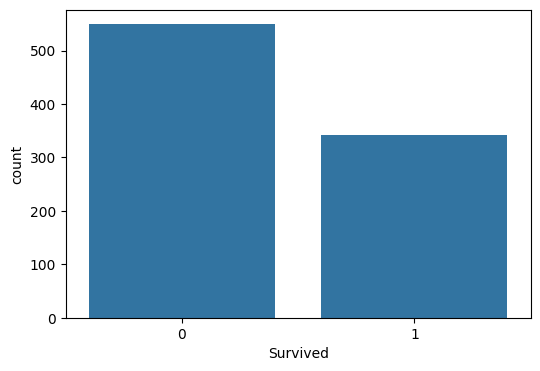

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x="Survived", data=train)

In [ ]:
train["Sex"].value_counts()

,count
Sex,
male,577
female,314


<Axes: >

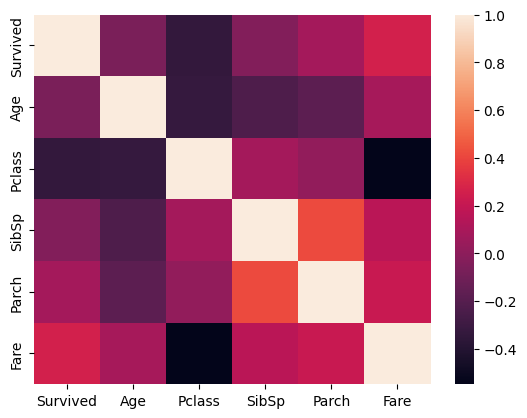

In [ ]:
sns.heatmap(train[["Survived","Age","Pclass","SibSp", "Parch", "Fare"]].corr())

<Axes: xlabel='Sex', ylabel='count'>

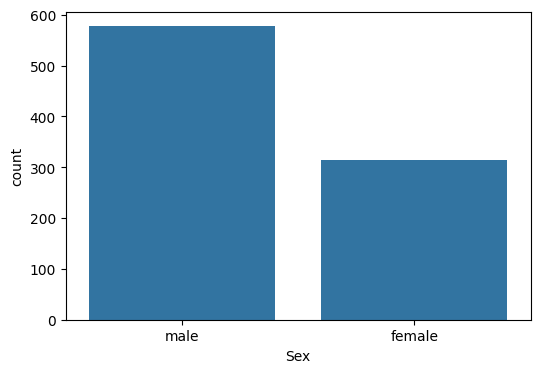

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x="Sex", data=train)

<Axes: xlabel='Survived', ylabel='count'>

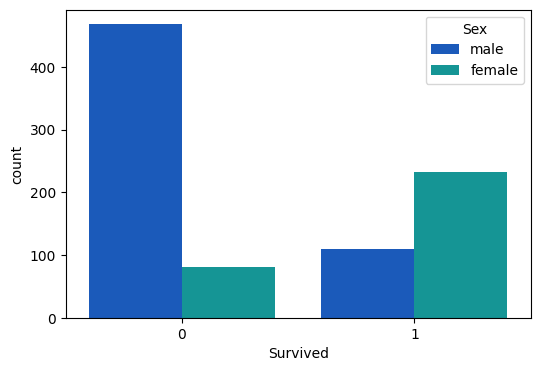

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x="Survived", hue="Sex", data=train, palette = 'winter')

<Axes: xlabel='Pclass', ylabel='count'>

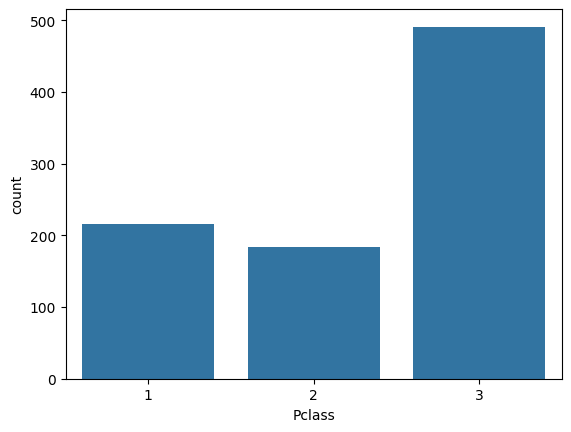

In [ ]:
sns.countplot(x="Pclass", data = train)

<Axes: xlabel='Pclass', ylabel='count'>

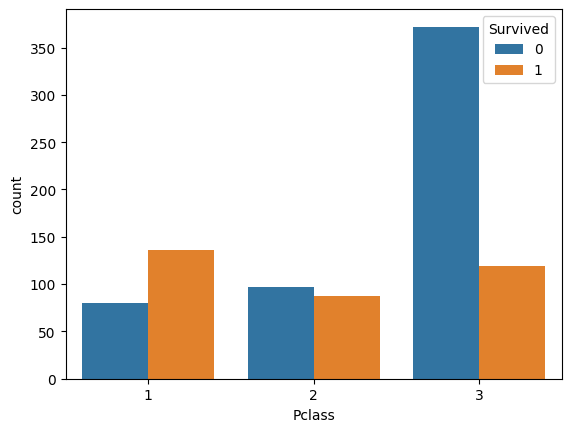

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data = train)

**Encoding the categorical column into Numerical Values**

In [ ]:
train.replace(
    {'Sex':{"male":0, "female":1}, 'Embarked':{'S':0, 'C':1, 'Q':2}},inplace = True
)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Separating Target and Features**

In [ ]:
X = train.drop(columns=["PassengerId","Name","Ticket","Survived"], axis = 1)
Y = train["Survived"]

**Splitting the data into training and testing**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


**Model Training**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation**

In [ ]:
training_result = model.predict(X_train)

In [ ]:
accuracy = accuracy_score(training_result, Y_train)
print(accuracy)

0.8075842696629213


In [ ]:
#Accuracy score in the test data
test_result = model.predict(X_test)
test_accuracy = accuracy_score(test_result, Y_test)

In [ ]:
print(test_accuracy)

0.7821229050279329
